In [210]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/Users/sharo/OneDrive/Desktop/ML_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/sharo/OneDrive/Desktop/ML_data\Data_Test.xlsx
C:/Users/sharo/OneDrive/Desktop/ML_data\Data_Train.xlsx
C:/Users/sharo/OneDrive/Desktop/ML_data\Sample_Submission.xlsx


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [212]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtree=ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
from sklearn.decomposition import PCA

In [213]:
train=pd.read_excel('C:/Users/sharo/OneDrive/Desktop/ML_data/Data_Train.xlsx')
test=pd.read_excel('C:/Users/sharo/OneDrive/Desktop/ML_data/Data_Test.xlsx')
sample=pd.read_excel('C:/Users/sharo/OneDrive/Desktop/ML_data/Sample_Submission.xlsx')

In [214]:
train.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


Cleanup:

In [215]:
train['Restaurant']=le.fit_transform(train['Restaurant'])
train['Location']=le.fit_transform(train['Location'])
train['Minimum_Order']=pd.to_numeric(train['Minimum_Order'].str.replace('₹',' '))
train['Total_Cost']=pd.to_numeric(train['Total_Cost'].str.replace('[^0-9]',''))
train['Rating']=pd.to_numeric(train['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
train['Time_Taken_To_Cook']=pd.to_numeric(train['Time_Taken_To_Cook'].apply(lambda x : np.nan if x=='-' else x))
train['No_Of_Items']=pd.to_numeric(train['No_Of_Items'].apply(lambda x : np.nan if x=='-' else x))
train['Delivery_Time']=pd.to_numeric(train['Delivery_Time'].str.replace('[^0-9]',''))

In [216]:
train.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,521.0,235.0,65


In [217]:
q1=train['Rating'].quantile(0.25)
q3=train['Rating'].quantile(0.75)
iqr=q3-q1
train['Rating']=train['Rating'].apply(lambda x: np.nan if x>q3+1.5*iqr or x<q1-1.5*iqr else x)
train['Rating']=train['Rating'].fillna(train['Rating'].median())


q1=train['Time_Taken_To_Cook'].quantile(0.25)
q3=train['Time_Taken_To_Cook'].quantile(0.75)
iqr=q3-q1
train['Time_Taken_To_Cook']=train['Time_Taken_To_Cook'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['Time_Taken_To_Cook']=train['Time_Taken_To_Cook'].fillna(train['Time_Taken_To_Cook'].mode()[0])


q1=train['No_Of_Items'].quantile(0.25)
q3=train['No_Of_Items'].quantile(0.75)
iqr=q3-q1
train['No_Of_Items']=train['No_Of_Items'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['No_Of_Items']=train['No_Of_Items'].fillna(round(train['No_Of_Items'].mean()))



q1=train['Total_Cost'].quantile(0.25)
q3=train['Total_Cost'].quantile(0.75)
iqr=q3-q1
train['Total_Cost']=train['Total_Cost'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
train['Total_Cost']=train['Total_Cost'].fillna(round(train['Total_Cost'].mean()))

In [218]:
train.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [219]:
train_01=train.copy()

In [220]:
train['Cuisines']=le.fit_transform(train['Cuisines'])

In [221]:
train.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,5086,10,995,200.0,50,3.5,12.0,4.0,30
1,1785,30,1116,100.0,50,3.5,11.0,4.0,30
2,571,19,1182,150.0,50,3.6,99.0,30.0,65
3,4708,28,1398,250.0,99,3.7,176.0,95.0,30
4,4896,26,388,200.0,99,3.2,4.0,39.0,65


In [222]:
x=train.drop('Delivery_Time',axis=1)
y=train['Delivery_Time']

In [223]:
x=x.apply(zscore)

R2-score for Logitic Regression:

In [224]:
start_time=time()
# model_list=[lr,dt,knn,rf,ada,bag,xtree]
Score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
Score.append(score)
print(pd.DataFrame({"lr": lr, "r2-score": Score}))
# print(pd.DataFrame(lr,Score),columns=['Model Used','R2-Score'])
end_time=time()
print(round(end_time-start_time,2),'sec')

                                                  lr  r2-score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.696606
0.64 sec


R2-score for K-nearest Neighbor:

In [225]:
start_time=time()
# model_list=[lr,dt,knn,rf,ada,bag,xtree]
Score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score=accuracy_score(y_test,y_pred)
Score.append(score)
print(pd.DataFrame({"knn": knn, "r2-score": Score}))
# print(pd.DataFrame(lr,Score),columns=['Model Used','R2-Score'])
end_time=time()
print(round(end_time-start_time,2),'sec')

                                                 knn  r2-score
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.697507
0.46 sec


Accuracy-Score for Random Forest:

Random Forest:

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
train_model = rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7798137578852509

Implementing Text Analysis Using Count Vector:

In [227]:
train_01.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [228]:
train_01['Cuisines']=train_01['Cuisines'].str.lower()
train_01['Cuisines']=train_01['Cuisines'].str.replace('[^a-z]',' ')

In [229]:
train_01.head()

,Restaurant,Location,Cuisines,Total_Cost,Minimum_Order,Rating,Time_Taken_To_Cook,No_Of_Items,Delivery_Time
0,5086,10,fast food rolls burger salad wraps,200.0,50,3.5,12.0,4.0,30
1,1785,30,ice cream desserts,100.0,50,3.5,11.0,4.0,30
2,571,19,italian street food fast food,150.0,50,3.6,99.0,30.0,65
3,4708,28,mughlai north indian chinese,250.0,99,3.7,176.0,95.0,30
4,4896,26,cafe beverages,200.0,99,3.2,4.0,39.0,65


In [230]:
cf=count.fit(train_01['Cuisines'])
print(cf)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [231]:
cols=['Restaurant','Location','Total_Cost','Minimum_Order','Rating','Votes','No_Of_Items']

In [232]:
data=pd.concat([pd.DataFrame(zscore(train_01.drop(['Cuisines','Delivery_Time'],axis=1)),columns=cols),pd.DataFrame(count.transform(train_01['Cuisines']).todense())],axis=1)

In [233]:
print(data)

       Restaurant  Location  Total_Cost  Minimum_Order    Rating     Votes  \
0        0.623738 -0.717664    0.431696      -0.180293 -0.298223 -0.555967   
1       -0.902235  1.358903   -1.155267      -0.180293 -0.298223 -0.565427   
2       -1.463438  0.216791   -0.361786      -0.180293 -0.029808  0.267058   
3        0.448998  1.151247    1.225177       2.461158  0.238608  0.995482   
4        0.535906  0.943590    0.431696       2.461158 -1.103469 -0.631648   
...           ...       ...         ...            ...       ...       ...   
11089    1.403136 -1.755948    1.225177      -0.180293  1.580685  2.414491   
11090   -0.127460  1.255075   -1.155267      -0.180293 -0.029808 -0.328926   
11091   -0.676644 -0.094694   -1.155267      -0.180293 -0.298223 -0.243785   
11092   -0.354438  1.358903   -1.155267      -0.180293 -1.371885 -0.442447   
11093   -0.218066  1.462732   -1.155267      -0.180293 -0.029808 -0.631648   

       No_Of_Items  0  1  2  ...  98  99  100  101  102  103  1

In [234]:
x=data
y=train_01['Delivery_Time']

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7912285971763292

PCA for Dimensionality Reduction:

In [236]:
x=data
y=train_01['Delivery_Time']

In [237]:
x.shape

(11094, 115)

In [238]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

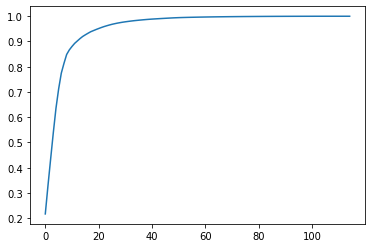

In [239]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [240]:
pca=PCA(n_components=22)

In [241]:
x=pca.fit_transform(x)

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.771402823670772

Checking on Test Dataset:

In [243]:
test['Restaurant']=le.fit_transform(test['Restaurant'])
test['Location']=le.fit_transform(test['Location'])
test['Minimum_Order']=pd.to_numeric(test['Minimum_Order'].str.replace('₹',' '))
test['Total_Cost']=pd.to_numeric(test['Total_Cost'].str.replace('[^0-9]',''))
test['Rating']=pd.to_numeric(test['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
test['Time_Taken_To_Cook']=pd.to_numeric(test['Time_Taken_To_Cook'].apply(lambda x : np.nan if x=='-' else x))
test['No_Of_Items']=pd.to_numeric(test['No_Of_Items'].apply(lambda x : np.nan if x=='-' else x))
test['Rating']=test['Rating'].fillna(test['Rating'].median())
test['Time_Taken_To_Cook']=test['Time_Taken_To_Cook'].fillna(test['Time_Taken_To_Cook'].mode()[0])
test['No_Of_Items']=test['No_Of_Items'].fillna(test['No_Of_Items'].median())
test['Total_Cost']=test['Total_Cost'].fillna(test['Total_Cost'].mean())
sample['Delivery_Time']=le.fit_transform(pd.to_numeric(sample['Delivery_Time'].str.replace('[^0-9]','')))

In [244]:
test['Cuisines']=test['Cuisines'].str.lower()
test['Cuisines']=test['Cuisines'].str.replace('[^a-z]',' ')

In [245]:
count.fit(test['Cuisines'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [246]:
pca=PCA(n_components=22)

In [247]:
data=pd.concat([pd.DataFrame(zscore(test.drop(['Cuisines'],axis=1)),columns=cols),pd.DataFrame((count.transform(test['Cuisines']).todense()))],axis=1)

In [248]:
data.head()

,Restaurant,Location,Total_Cost,Minimum_Order,Rating,Votes,No_Of_Items,0,1,2,...,82,83,84,85,86,87,88,89,90,91
0,-0.897152,0.010057,1.350471,-0.177278,1.619203,0.368696,0.503777,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.093993,0.010057,-0.833142,-0.177278,-0.000097,-0.368519,-0.256583,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.113111,1.155165,-0.833142,-0.177278,-0.000097,-0.308126,-0.294793,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.292626,-1.655553,0.040303,-0.177278,-0.000097,-0.245650,-0.229837,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.715220,1.155165,-0.396419,-0.177278,-1.889281,-0.303961,-0.302434,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
x=pca.fit_transform(data)

In [250]:
print(x)

[[ 1.65441012e+00 -4.47215988e-01  2.24004870e-01 ...  1.12124644e-01
   1.22924374e-01  6.00999852e-02]
 [-7.06458930e-01  4.64952525e-01 -7.31348695e-01 ...  1.56267967e-03
   8.40215041e-02  4.30183144e-02]
 [-7.55729656e-01  3.88210740e-01  7.67981057e-01 ... -7.40503320e-02
   1.22417067e-01  1.08944180e-02]
 ...
 [-1.18451526e+00  1.10084826e+00 -7.09844857e-01 ... -6.26162509e-02
   4.64056372e-02  4.19921324e-02]
 [-1.09592876e+00 -4.08731206e-01  1.70880849e+00 ... -8.28279240e-02
  -1.85079437e-01  1.95420551e-02]
 [-5.10383538e-01 -1.75419979e+00  1.07896756e+00 ...  1.49839135e-01
   8.41338157e-02 -1.62416359e-01]]


In [251]:
data['Delivery_Time']=pd.DataFrame(rf.predict(x))
print(rf.predict(x))

[30 30 30 ... 30 30 30]


In [252]:
data['Delivery_Time'].value_counts()

30    2526
45     247
65       1
Name: Delivery_Time, dtype: int64

In [253]:
sample_refined=[]
for i in data['Delivery_Time']:
    i=(str(i)+' minutes')
    sample_refined.append(i)

In [254]:
sample_refined=pd.DataFrame(sample_refined,columns=['Delivery_Time'])
print(sample_refined)

     Delivery_Time
0       30 minutes
1       30 minutes
2       30 minutes
3       30 minutes
4       45 minutes
...            ...
2769    30 minutes
2770    30 minutes
2771    30 minutes
2772    30 minutes
2773    30 minutes

[2774 rows x 1 columns]


In [255]:
sample_refined.to_excel('Machine_Hack_Submit.xlsx',index=False)

In [256]:
pd.read_excel('Machine_Hack_Submit.xlsx')['Delivery_Time'].value_counts()

30 minutes    2526
45 minutes     247
65 minutes       1
Name: Delivery_Time, dtype: int64

CREATING A PICKLE MODEL:

In [257]:
data01 = pd.read_excel('C:/Users/sharo/OneDrive/Desktop/ML_data/Data_Train.xlsx')
data02 = pd.DataFrame(data01)
X = data02.iloc[1:, 1:-1]
Y = data02.iloc[1:, -1]

In [258]:
y=le.fit_transform(Y)

In [259]:
print(y)

[3 5 3 ... 3 3 3]


In [260]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [261]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)

In [262]:
# import pickle
# pickle.dump(train_model,open('model.pkl','wb'))
# model = pickle.load(open('model.pkl','rb'))